# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print recipes[0]

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

C:\Users\PDudukin\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\PDudukin\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [6]:
print texts[0]
print corpus[0]

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [7]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=40, id2word=dictionary, passes=5)

In [8]:
topics = ldamodel.show_topics(num_topics=40)
ldamodel.show_topics(num_topics=40)

[(0,
  u'0.083*"salt" + 0.080*"cooking spray" + 0.079*"garlic cloves" + 0.064*"olive oil" + 0.064*"chopped onion" + 0.035*"fat free less sodium chicken broth" + 0.034*"crushed red pepper" + 0.034*"water" + 0.033*"black pepper" + 0.032*"ground black pepper"'),
 (1,
  u'0.130*"carrots" + 0.077*"onions" + 0.052*"cabbage" + 0.043*"spinach" + 0.040*"celery" + 0.039*"water" + 0.037*"beef" + 0.031*"low sodium chicken broth" + 0.029*"salt" + 0.026*"green cabbage"'),
 (2,
  u'0.066*"dry red wine" + 0.047*"shortening" + 0.046*"beef broth" + 0.045*"vegetable oil cooking spray" + 0.044*"grape tomatoes" + 0.039*"cilantro sprigs" + 0.035*"french bread" + 0.033*"dried rosemary" + 0.030*"all-purpose flour" + 0.030*"sun-dried tomatoes"'),
 (3,
  u'0.117*"oil" + 0.112*"potatoes" + 0.081*"salt" + 0.050*"chickpeas" + 0.049*"pepper" + 0.048*"onions" + 0.046*"rice" + 0.030*"water" + 0.029*"coriander" + 0.029*"saffron"'),
 (4,
  u'0.061*"green bell pepper" + 0.057*"garlic powder" + 0.055*"salt" + 0.054*"caye

In [9]:
top_words_in_topic = ldamodel.show_topic(1,topn=10)
print top_words_in_topic[0][0]

carrots


In [10]:
words = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
result = dict(zip(words, [0]*6))
for w in words:
    for tpid, topic in enumerate(topics):
        top_words_in_topic = ldamodel.show_topic(tpid,topn=10)
        for top_list in top_words_in_topic:
            if w == top_list[0]:   
                result[w] += 1
                    
result

{'chicken': 1, 'eggs': 2, 'mushrooms': 1, 'salt': 20, 'sugar': 7, 'water': 10}

In [11]:
answer = [result.get(w) for w in words]
print answer

[20, 7, 10, 1, 1, 2]


In [12]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [13]:
save_answers1(answer[0],answer[1],answer[2],answer[3],answer[4],answer[5])

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [14]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [15]:
list4000 = [dictionary2.dfs.keys()[k] for k in range(len(dictionary2)) if dictionary2.dfs.values()[k]>4000]
print list4000

[0, 4, 9, 12, 17, 21, 29, 45, 48, 54, 100, 117]


In [16]:
flt_ingr = [dictionary[k] for k in list4000]

dictionary2.filter_tokens(list4000)

dict_size_before = len(dictionary.dfs)
dict_size_after = len(dictionary2.dfs)

print dict_size_before, dict_size_after

6714 6702


In [17]:
corpus_size_before = 0
corpus_size_after = 0

for c in corpus:
    corpus_size_before +=len(c)

corpus2 = [dictionary2.doc2bow(text) for text in texts]    
    
for c in corpus2:
    corpus_size_after +=len(c)

print corpus_size_before, corpus_size_after

428249 343665


In [18]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [19]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [45]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel2 = models.ldamodel.LdaModel(corpus2, num_topics=40, id2word=dictionary2, passes=5)

In [46]:
list_coh = ldamodel.top_topics(corpus)

In [47]:
list_coherence = []

for i in range(len(list_coh)):
    list_coherence.append(list_coh[i][1])

coherence = sum(list_coherence)/len(list_coherence)
print coherence

-634.445052538


In [96]:
list_coh2 = ldamodel2.top_topics(corpus2)

In [97]:
list_coherence2 = []

for i in range(len(list_coh2)):
    list_coherence2.append(list_coh2[i][1])

coherence2 = sum(list_coherence2)/len(list_coherence2)
print coherence2

-668.258774508


In [98]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [99]:
save_answers3(coherence, coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [52]:
ldamodel2.get_document_topics(corpus2[0])

[(5, 0.13075189526717992), (7, 0.50514668416438091), (11, 0.24847642056843799)]

Также выведите содержимое переменной *.alpha* второй модели:

In [53]:
ldamodel.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [54]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel3 = models.ldamodel.LdaModel(corpus2, num_topics=40, id2word=dictionary2, passes=5, alpha=1)

In [57]:
ldamodel3.get_document_topics(corpus2[0])

[(0, 0.021279626726348727),
 (1, 0.021276595744681666),
 (2, 0.021286174658713786),
 (3, 0.022008085342315801),
 (4, 0.021276595744680857),
 (5, 0.021302897427485375),
 (6, 0.02155278217781241),
 (7, 0.024297956540417925),
 (8, 0.021284573497080257),
 (9, 0.021369167281408977),
 (10, 0.021895738962453181),
 (11, 0.021310162429463007),
 (12, 0.021303192168055714),
 (13, 0.021276595744680857),
 (14, 0.021276595744688018),
 (15, 0.027086198919259185),
 (16, 0.021594171099743289),
 (17, 0.042603177567207405),
 (18, 0.021444034329676131),
 (19, 0.076775317609625499),
 (20, 0.021312692334604477),
 (21, 0.021276728352796891),
 (22, 0.021318470833581859),
 (23, 0.021314547515050096),
 (24, 0.021276595744680857),
 (25, 0.044849090746598701),
 (26, 0.02130348113112434),
 (27, 0.021352004014148475),
 (28, 0.043082043854070315),
 (29, 0.034939063170941212),
 (30, 0.021278288845157107),
 (31, 0.021276595744693226),
 (32, 0.022056475815831339),
 (33, 0.02138215497504202),
 (34, 0.021376748300129287)

In [63]:
dstr2 = ldamodel2.get_document_topics(corpus2, minimum_probability=0.01)
dstr3 = ldamodel3.get_document_topics(corpus2, minimum_probability=0.01)

In [64]:
count_model2 = 0
count_model3 = 0

for elt in dstr2:
    count_model2 += len(elt)
    
for elt in dstr3:
    count_model3 += len(elt)

In [65]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [66]:
save_answers4(count_model2, count_model3)

In [68]:
print count_model2, count_model3

198135 1590960


Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [79]:
topics = ldamodel2.get_document_topics(corpus2)
print topics[0], len(topics)

[(5, 0.13073992340627594), (7, 0.50436917365717626), (11, 0.24926590293654671)] 39774


In [83]:
p = np.zeros([len(topics), 40])
for i in range(len(topics)):
    for t in topics[i]:
        p[i, t[0]] = t[1]

p[:3]

y = [recipe["cuisine"] for recipe in recipes]

y[:5]

[u'greek', u'southern_us', u'filipino', u'indian', u'indian']

In [86]:
accuracy = cross_val_score(RandomForestClassifier(n_estimators=100), p, y).mean()
print accuracy

0.557450488373


In [87]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [88]:
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [89]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

In [91]:
generate_recipe(ldamodel2, 10)

adobo sauce
cilantro leaves
pinenuts
robiola
lime
lime wedges
brown gravy mix
dried oregano
fettucine
poblano chiles


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [92]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [93]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [94]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

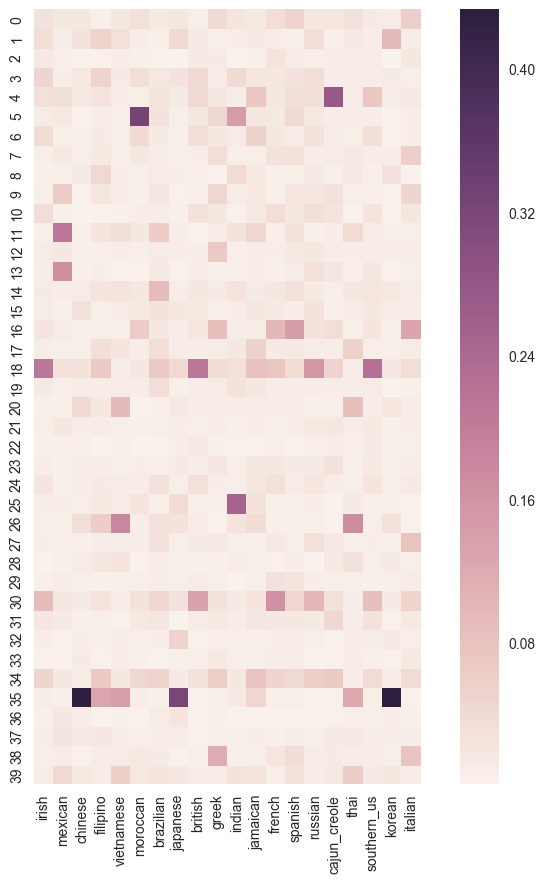

In [95]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(ldamodel, corpus, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 